### Main Program

In [7]:
import cv2
import time

start=time.time() #Timer
inter=time.time() #Timer
end=time.time() #Timer

vidcap = cv2.VideoCapture(-1) #Opening Camera
if vidcap.isOpened():
    ret, frame = vidcap.read() #Frame Capture
    if ret:
        while(True):           
            if end - start > 10: #stop after 10 sec
                break
            ret, frame = vidcap.read()
            cv2.imshow("Frame",frame)   #show captured frame
            cv2.waitKey(1) #Wait 1ms to fix output
                
            end=time.time()
        cv2.destroyAllWindows()
    else:
        print("Frame not captured")
else:
    print("Cannot open camera")
vidcap.release()

### Test Cells

In [4]:
import time

start=time.time()
inter=time.time()
end=time.time()

while(end - start < 5):
    end=time.time()
    if(end - inter > 1):
        inter=time.time()
        print("Time")

Time
Time
Time
Time


In [13]:
import cv2
import time
vidcap = cv2.VideoCapture(0) #Opening Camera 0
if vidcap.isOpened():
    ret, frame = vidcap.read() #Frame Capture
    if ret:
        print("Framed")
        cv2.imshow("Frame",frame)
        cv2.waitKey(0)
    else:
        print("Frame not captured")
else:
    print("Cannot open camera")

vidcap.release()

Framed


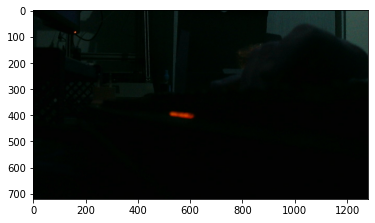

In [15]:
import matplotlib.pyplot as plt
import cv2
vidcap = cv2.VideoCapture(-1) #Opening Camera 0
ret, frame = vidcap.read()
imgplot = plt.imshow(frame)
plt.show()
vidcap.release()

In [1]:
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (8,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (8,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(50)
cv.destroyAllWindows()

In [2]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(ret)
print(mtx)
print(dist)
print(rvecs)
print(tvecs)

0.8262480366218831
[[819.83614964   0.         641.69044164]
 [  0.         819.09003266 341.81366636]
 [  0.           0.           1.        ]]
[[-0.42673426  0.19252523 -0.00092188 -0.00148215  0.04018296]]
(array([[ 0.58543658],
       [ 0.07573566],
       [-0.04234819]]), array([[-0.65405747],
       [ 0.03418421],
       [ 0.0105261 ]]), array([[ 0.11582439],
       [-0.58448889],
       [-0.08101267]]), array([[ 0.04181162],
       [ 0.06266536],
       [-0.02173374]]), array([[-0.17302695],
       [-0.0359965 ],
       [-0.03846005]]), array([[-0.16885322],
       [-0.21602354],
       [-0.12407691]]), array([[ 0.0151077 ],
       [-0.80615104],
       [-0.0717068 ]]), array([[ 0.02937692],
       [-0.53703103],
       [-0.0208815 ]]), array([[ 0.04650039],
       [ 0.40766058],
       [-0.02940294]]), array([[ 0.03075908],
       [-0.00663737],
       [ 0.00351999]]), array([[ 0.11184555],
       [-0.57924764],
       [-0.05790753]]))
(array([[-1.14154739],
       [-3.8967610

In [8]:
import numpy as np
img = cv.imread('cal.jpg')
mtx = np.array([[819.83614964,0.,641.69044164],[0.,819.09003266,341.81366636],[0.,0.,1.]])
dist = np.array([[-0.42673426,0.19252523,-0.00092188,-0.00148215,0.04018296]])
h,  w = img.shape[:2]
print(img.shape[:2])
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
print(newcameramtx)

(720, 1280)
[[657.48364258   0.         637.9138706 ]
 [  0.         653.73199463 339.94713197]
 [  0.           0.           1.        ]]


In [20]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresultTest.png', dst)

True

In [7]:
import numpy as np
x=np.array([[114,114,114]]*640)
print(x[0])
print(x.shape)

[114 114 114]
(640, 3)


In [60]:
import numpy as np
x=np.array([[0],[0],[0],[0],[0],[0]])
li = [[]]*12
print(li)

actTime = [float(1664093863.6783679)]
temp = li[2]
print(temp)
print(temp + actTime)
temp = temp + actTime + [5]
li[2] = temp
print(li[2])
t = li[2]
li[2].pop(0)
li[2].pop(0)
li[2].pop(0)
print(li)


[[], [], [], [], [], [], [], [], [], [], [], []]
[]
[1664093863.6783679]
[1664093863.6783679, 5]


IndexError: pop from empty list